# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime 
import os
# Import API key
from api_keys import api_key
from datetime import date

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

580

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [14]:
# Set up the url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={api_key}&units={units}&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=f0f54b86b33955c146448c7d43fafb88&units=imperial&q=


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [ ]:
#creating lists to store extracted values per city
city_name = []
country = []
date = []
lat = []
lng = []
temp = []
humidity = []
cloudiness = []
wind = []

#setting the counter values
record = 0
set_count = 1

print("Data Retrieval")

print("--------------------------------")

#creating loop to extract values per city and add them to the lists above
for city in cities:
   
    try:
        response = requests.get(f"{query_url}{city}").json()
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])
        city_record = response["name"]
        
        #creating a if statment to cycle through counter and reset counter to make set contain 50 cities
        if record > 48:
            record = 1
            set_count += 1
            city_name.append(response["name"])
        else:
            record += 1
            city_name.append(response["name"])
            
        print(f"Processing Record {record} of Set {set_count} | {city_record}")
        
        #using time.sleep to create time delay
        time.sleep(1.5)
              
    except :
              print("City not found. Skipping...")
              
    continue

print("-------------------------------")
print("Data Retrieval Complete")
print("-------------------------------")

Data Retrieval
--------------------------------
Processing Record 1 of Set 1 | Kapaa
City not found. Skipping...
Processing Record 2 of Set 1 | Clyde River
Processing Record 3 of Set 1 | George Town
Processing Record 4 of Set 1 | Geraldton
Processing Record 5 of Set 1 | Klaksvik
Processing Record 6 of Set 1 | Hobart
Processing Record 7 of Set 1 | Ucluelet
Processing Record 8 of Set 1 | Buta
Processing Record 9 of Set 1 | Port Elizabeth
Processing Record 10 of Set 1 | Portobelo
Processing Record 11 of Set 1 | Moron
Processing Record 12 of Set 1 | Butaritari
City not found. Skipping...
Processing Record 13 of Set 1 | Port Alfred
Processing Record 14 of Set 1 | Iqaluit
Processing Record 15 of Set 1 | Kodiak
Processing Record 16 of Set 1 | Mar del Plata
Processing Record 17 of Set 1 | Presidente Medici
City not found. Skipping...
Processing Record 18 of Set 1 | Bathsheba
Processing Record 19 of Set 1 | Cidreira
Processing Record 20 of Set 1 | Jamestown
Processing Record 21 of Set 1 | Phalo

Processing Record 37 of Set 4 | Belize
Processing Record 38 of Set 4 | Dudinka
Processing Record 39 of Set 4 | Iquique
Processing Record 40 of Set 4 | Mocuba
Processing Record 41 of Set 4 | Sechura
Processing Record 42 of Set 4 | Bereda
City not found. Skipping...
Processing Record 43 of Set 4 | Kavieng
Processing Record 44 of Set 4 | Talnakh
Processing Record 45 of Set 4 | Soederhamn
Processing Record 46 of Set 4 | Fort Nelson
Processing Record 47 of Set 4 | Cam Ranh
Processing Record 48 of Set 4 | San Jeronimo
City not found. Skipping...
Processing Record 49 of Set 4 | Morgan City
City not found. Skipping...
Processing Record 1 of Set 5 | Soyo
Processing Record 2 of Set 5 | Catuday
Processing Record 3 of Set 5 | Miraflores
Processing Record 4 of Set 5 | Kamiiso
Processing Record 5 of Set 5 | Tamandare
Processing Record 6 of Set 5 | Castro
Processing Record 7 of Set 5 | San Carlos
Processing Record 8 of Set 5 | Pouebo
Processing Record 9 of Set 5 | Provideniya
Processing Record 10 of 

Processing Record 25 of Set 8 | Souillac
Processing Record 26 of Set 8 | Muros
Processing Record 27 of Set 8 | Zhaoyuan
Processing Record 28 of Set 8 | Penzance
Processing Record 29 of Set 8 | Jalu
Processing Record 30 of Set 8 | Guymon
Processing Record 31 of Set 8 | West Bay
Processing Record 32 of Set 8 | Dalbandin
Processing Record 33 of Set 8 | Harper
City not found. Skipping...
Processing Record 34 of Set 8 | Srandakan
Processing Record 35 of Set 8 | Churapcha
Processing Record 36 of Set 8 | Canon City
Processing Record 37 of Set 8 | Quryq
Processing Record 38 of Set 8 | Beringovskiy
Processing Record 39 of Set 8 | Stans
Processing Record 40 of Set 8 | Port Lincoln
Processing Record 41 of Set 8 | Atagay
Processing Record 42 of Set 8 | Inongo
Processing Record 43 of Set 8 | Kitoy
Processing Record 44 of Set 8 | Lugovoy
Processing Record 45 of Set 8 | Saint-Philippe
Processing Record 46 of Set 8 | Navalmoral de la Mata
Processing Record 47 of Set 8 | Moerai
Processing Record 48 of 

In [ ]:
# Create a data frame from the data
weather_dict = { #key on left, right side is values
    "City": city_name,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": temp,
    "Wind Speed": wind
}

# Put data into data frame
weather_data_df = pd.DataFrame(weather_dict)

# Push the new Data Frame to a new CSV file
weather_data_df.to_csv("../weather_data.csv",
                  encoding="utf-8", index=False, header=True)

# Display the new data frame
weather_data_df.head()

In [8]:
#perform count on data frame, to make sure all columns are filled
weather_data_df.count()

City          526
Cloudiness    526
Country       526
Date          526
Humidity      526
Lat           526
Lng           526
Max Temp      526
Wind Speed    526
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

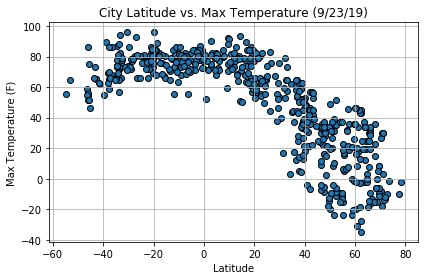

In [9]:
# Plot the graph
plt.scatter(lat, temp, marker="o", facecolors="tab:blue", edgecolors="black")

# Setting the title and axises 
plt.title("City Latitude vs. Max Temperature (9/23/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Add in a grid for the chart
plt.grid()

# Save our graph and show the grap
plt.tight_layout()
plt.savefig("../Images/city_lat_vs_max_temp.png")
plt.show()

#### Latitude vs. Humidity Plot

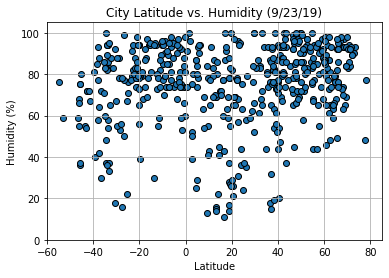

In [10]:
# Plot the graph
plt.scatter(lat, humidity, marker="o", facecolors="tab:blue", edgecolors="black")

# Setting the title and axises 
plt.title("City Latitude vs. Humidity (9/23/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Add in a grid for the chart
plt.grid()

# Setting graph limits
plt.xlim(-60, 85)
plt.ylim(0, 105)

# Save our graph and show the grap
#plt.tight_layout()
plt.savefig("../Images/city_lat_vs_humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

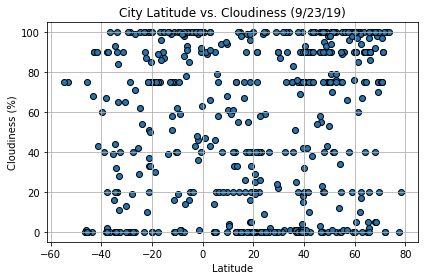

In [11]:
# Plot the graph
plt.scatter(lat, cloudiness, marker="o", facecolors="tab:blue", edgecolors="black")

# Setting the title and axises 
plt.title("City Latitude vs. Cloudiness (9/23/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Add in a grid for the chart
plt.grid()

# Save our graph and show the grap
plt.tight_layout()
plt.savefig("../Images/city_lat_vs_cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

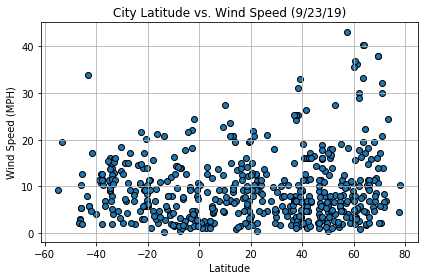

In [12]:
# Plot the graph
plt.scatter(lat, wind, marker="o", facecolors="tab:blue", edgecolors="black")

# Setting the title and axises 
plt.title("City Latitude vs. Wind Speed (9/23/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")

# Add in a grid for the chart
plt.grid()

# Save our graph and show the grap
plt.tight_layout()
plt.savefig("../Images/city_lat_vs_wind_speed.png")
plt.show()